In [31]:
###

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


kr_w0 = np.array([1]) # End-point kr_w and initial value
kr_w02 = np.array([1]) # End-point kr_w and initial value
kr_w03 = np.array([1]) # End-point kr_w and initial value


b = 0.73 # n_b = 3.7 is the corresponding exp for symmetric Corey curves with a = 0.
kr_n0 = 1.0 # End-point relperm
visc_n = 1
visc_w = 1

M = visc_w/visc_n # Visc match

n_o1 = 5.0
a1 = 0.0
n_o2 = 2.0
a2 = -0.0  # TR: Assume this is symmetric around 0: a > 0 if n_o < n_b
n_o3 = 3.71
a3 = -0.0


Sorw = 0.0
Swi = 0.0


## Corey fuctions
def krn_Corey(kr_n0, n_o, sw, swi=0, sorw=0): return kr_n0 * ((1 - sw - sorw)/(1-swi-sorw))**n_o
def dkrn_Corey(kr_n0, n_o, sw, swi=0, sorw=0): return -kr_n0 * n_o * ((1 - sw - sorw)/(1-swi-sorw))**(n_o - 1)
def krw_Corey(kr_w0, n_w, sw, swi=0, sorw=0): return kr_w0 * ((sw-swi)/(1-swi-sorw))**n_w
def dkrw_Corey(kr_w0, n_w, sw, swi=0, sorw=0): return kr_w0 * n_w * ((sw-swi)/(1-swi-sorw))**(n_w - 1)



dkr_w1 = lambda sw, kr_w: 1/(1 - b) * (kr_w/sw +
                                       b*M*dkrn_Corey(kr_n0, n_o1, sw, Swi, Sorw) -
                                       (M*dkrn_Corey(kr_n0, n_o1, sw, Swi, Sorw) +
                                        M*krn_Corey(kr_n0, n_o1, sw, Swi, Sorw)/(1-sw)) + a1)

dkr_w2 = lambda sw, kr_w: 1/(1 - b) * (kr_w/sw +
                                       b*M*dkrn_Corey(kr_n0, n_o2, sw, Swi, Sorw) -
                                       (M*dkrn_Corey(kr_n0, n_o2, sw, Swi, Sorw) +
                                        M*krn_Corey(kr_n0, n_o2, sw, Swi, Sorw)/(1-sw)) + a2)

dkr_w3 = lambda sw, kr_w: 1/(1 - b) * (kr_w/sw +
                                       b*M*dkrn_Corey(kr_n0, n_o3, sw, Swi, Sorw) -
                                       (M*dkrn_Corey(kr_n0, n_o3, sw, Swi, Sorw) +
                                        M*krn_Corey(kr_n0, n_o3, sw, Swi, Sorw)/(1-sw)) + a3)


sw_span = (0.99 - Sorw , 0.01 + Swi)
sw_eval = np.linspace(0.99 - Sorw , 0.01 + Swi, 200)


sol1 = solve_ivp(dkr_w1, sw_span, kr_w0, t_eval=sw_eval)
sol2 = solve_ivp(dkr_w2, sw_span, kr_w02, t_eval=sw_eval)
sol3 = solve_ivp(dkr_w3, sw_span, kr_w03, t_eval=sw_eval)

v_p1 = krn_Corey(kr_n0, n_o1, sol1.t, Swi, Sorw) / visc_n + sol1.y[0] / visc_w
v_p2 = krn_Corey(kr_n0, n_o2, sol2.t, Swi, Sorw) / visc_n + sol2.y[0] / visc_w
v_p3 = krn_Corey(kr_n0, n_o3, sol3.t, Swi, Sorw) / visc_n + sol3.y[0] / visc_w


v_p1_diff = np.diff(v_p1) / np.diff(sol1.t)
v_p2_diff = np.diff(v_p2) / np.diff(sol2.t)
v_p3_diff = np.diff(v_p3) / np.diff(sol3.t)

v_m1 = (sol1.t[:-1] / visc_w * (np.diff(sol1.y[0]/sol1.t) / np.diff(sol1.t)) + 
        (1-sol1.t[:-1]) / visc_n * (np.diff(krn_Corey(kr_n0, n_o1, sol1.t, Swi, Sorw) / (1-sol1.t)) / np.diff(sol1.t)))

v_m2 = (sol2.t[:-1] / visc_w * (np.diff(sol2.y[0]/sol2.t) / np.diff(sol2.t)) + 
        (1-sol2.t[:-1]) / visc_n * (np.diff(krn_Corey(kr_n0, n_o2, sol2.t, Swi, Sorw) / (1-sol2.t)) / np.diff(sol2.t)))

v_m3 = (sol3.t[:-1] / visc_w * (np.diff(sol3.y[0]/sol3.t) / np.diff(sol3.t)) + 
        (1-sol3.t[:-1]) / visc_n * (np.diff(krn_Corey(kr_n0, n_o3, sol3.t, Swi, Sorw) / (1-sol3.t)) / np.diff(sol3.t)))



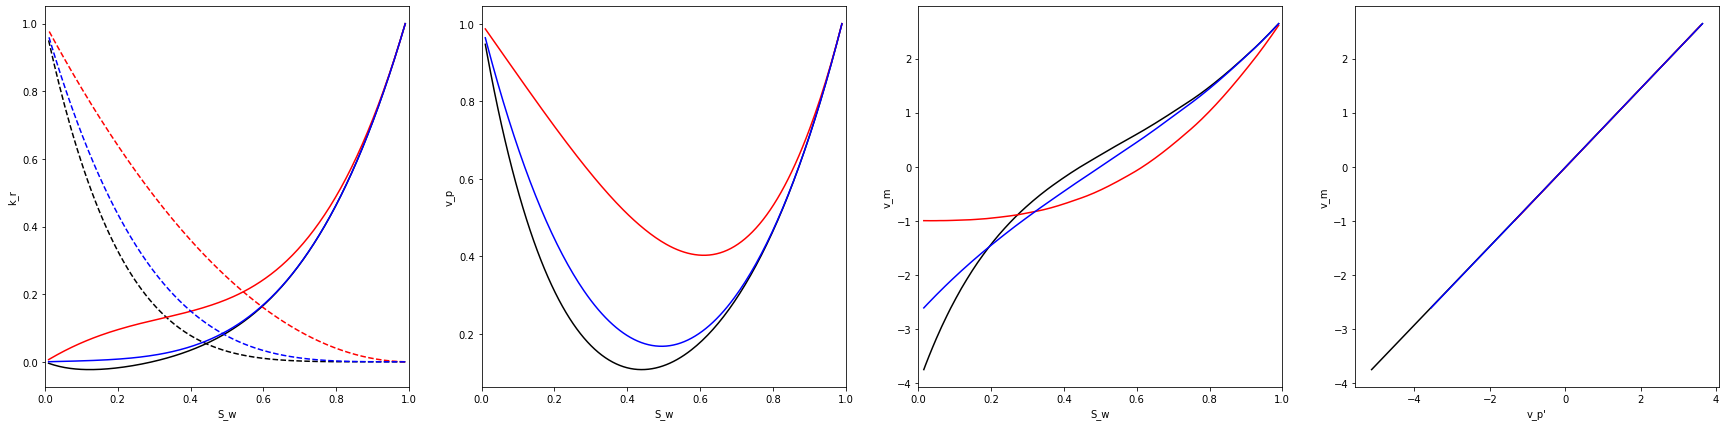

In [32]:
#
plt.figure(figsize=(30,7))

plt.subplot(141)
plt.plot(sol1.t, sol1.y[0], 'k')
plt.plot(sw_eval, krn_Corey(kr_n0, n_o1, sw_eval, Swi, Sorw), '--k')
plt.plot(sol2.t, sol2.y[0], 'r')
plt.plot(sw_eval, krn_Corey(kr_n0, n_o2, sw_eval, Swi, Sorw), '--r')
plt.plot(sol3.t, sol3.y[0], 'b')
plt.plot(sw_eval, krn_Corey(kr_n0, n_o3, sw_eval, Swi, Sorw), '--b')
plt.xlim(0,1)
plt.ylabel("k_r")
plt.xlabel("S_w")

plt.subplot(142)
plt.plot(sol1.t, v_p1, color='k')
plt.plot(sol2.t, v_p2, color='r')
plt.plot(sol3.t, v_p3, color='b')
plt.xlim(0,1)
plt.ylabel("v_p")
plt.xlabel("S_w")

plt.subplot(143)
plt.plot(sol1.t[:-1], v_m1, color='k')
plt.plot(sol2.t[:-1], v_m2, color='r')
plt.plot(sol3.t[:-1], v_m3, color='b')
plt.xlim(0,1)
plt.ylabel("v_m")
plt.xlabel("S_w")

plt.subplot(144)
plt.plot(v_p1_diff, v_m1, color='k')
plt.plot(v_p2_diff, v_m2, color='r')
plt.plot(v_p3_diff, v_m3, color='b')
plt.ylabel("v_m")
plt.xlabel("v_p'")

plt.show()